# Importing and reading data

## Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

## Reading data

In [2]:
drugs = pd.read_csv("/home/gustavo/github/mestrado/reworks/data/fda_approved_padel.csv")
print(drugs.shape)
drugs.head()

(1895, 1890)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Separating response variables

In [3]:
flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol"
]

drugs_features = drugs.drop(labels=flag_columns, axis=1)
print(drugs_features.shape)
drugs_features.head()

(1895, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# response variables
response_variable = drugs[flag_columns].drop(columns=["ROMol"])
response_variable.head(3)

,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True


In [5]:
# Explanatory variables (only descriptors)

explanatory_variables = drugs_features.iloc[:, 0:].copy()
explanatory_variables.head(3)

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171


# Dealing with infinity values

In [6]:
num_infinity = np.sum(np.isinf(explanatory_variables))
print(f"Number of infinity values in padel descriptors calculation, before replacing it with NaN: {num_infinity.sum()}")

# Replacing the negative and positive infinity with NaN
explanatory_variables = explanatory_variables.replace([np.inf, -np.inf], np.nan)

# Count again
num_infinity = np.sum(np.isinf(explanatory_variables))
print(f"Number of infinity values in padel descriptors calculation, after replacing with Nan: {num_infinity.sum()}")


Number of infinity values in padel descriptors calculation, before replacing it with NaN: 30
Number of infinity values in padel descriptors calculation, after replacing with Nan: 0


# Scaling of variables

In [7]:
scaler = StandardScaler()
explanatory_variables_scaled = pd.DataFrame(scaler.fit_transform(explanatory_variables), columns=explanatory_variables.columns)
print(explanatory_variables_scaled.shape)
explanatory_variables_scaled.head()

(1895, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-0.412165,0.122700,-0.271994,-1.317922,-1.867427,-1.32238,-1.323966,-1.712033,-1.887463,-1.435924,...,-1.197495,1.835419,0.663412,1.003914,-1.108395,-1.352440,-1.004723,-0.870580,-0.935053,0.298179
1,-0.412165,-0.236100,-0.190291,-1.209075,-1.822964,-1.32238,-1.323966,-1.670566,-1.802323,-1.435924,...,-0.072724,0.270976,0.876816,0.840564,-2.302535,-1.296684,-0.996441,-0.862315,-0.121005,-0.368169
2,-0.412165,-0.237732,-0.189772,-1.284284,-1.873645,-1.32238,-1.323966,-1.712033,-1.802323,-1.511031,...,0.181535,0.369860,0.793586,0.706307,2.753002,-1.312481,-1.003891,-0.867934,0.149980,2.422387
3,-0.412165,0.270602,-0.286837,-1.031362,-1.722519,-1.32238,-1.323966,-1.629100,-1.887463,-1.285708,...,-0.033983,-0.102851,6.966484,1.054841,-0.521463,-1.275850,-0.990470,-0.857145,-0.079715,4.080764
4,-0.412165,0.052770,-0.261147,-1.312939,-1.759372,-1.32238,-1.323966,-1.670566,-1.887463,-1.360816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Zero variance filter

Generating a function that removes near zero variance variables. Threshold is going to be set to 0.0.5

In [8]:
def variance_threshold_selector(data, threshold=0.05):
    """
    Recieves a SCALED dataframe and returns non-zero variance dataframe
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [9]:
explanatory_variables_no_low_var = variance_threshold_selector(explanatory_variables_scaled)
print(explanatory_variables_no_low_var.shape)
explanatory_variables_no_low_var.head()

(1895, 1651)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-0.412165,0.122700,-0.271994,-1.317922,-1.867427,-1.32238,-1.323966,-1.712033,-1.887463,-1.435924,...,-1.197495,1.835419,0.663412,1.003914,-1.108395,-1.352440,-1.004723,-0.870580,-0.935053,0.298179
1,-0.412165,-0.236100,-0.190291,-1.209075,-1.822964,-1.32238,-1.323966,-1.670566,-1.802323,-1.435924,...,-0.072724,0.270976,0.876816,0.840564,-2.302535,-1.296684,-0.996441,-0.862315,-0.121005,-0.368169
2,-0.412165,-0.237732,-0.189772,-1.284284,-1.873645,-1.32238,-1.323966,-1.712033,-1.802323,-1.511031,...,0.181535,0.369860,0.793586,0.706307,2.753002,-1.312481,-1.003891,-0.867934,0.149980,2.422387
3,-0.412165,0.270602,-0.286837,-1.031362,-1.722519,-1.32238,-1.323966,-1.629100,-1.887463,-1.285708,...,-0.033983,-0.102851,6.966484,1.054841,-0.521463,-1.275850,-0.990470,-0.857145,-0.079715,4.080764
4,-0.412165,0.052770,-0.261147,-1.312939,-1.759372,-1.32238,-1.323966,-1.670566,-1.887463,-1.360816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Descale Data

We need to restore the data before it was scaled for the variance filter applied.

In [10]:
drugs_scaler = explanatory_variables[explanatory_variables_no_low_var.columns].copy()
print(drugs_scaler.shape)
drugs_scaler.head(3)

(1895, 1651)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171


In [11]:
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

# descaling

explanatory_variables_descaled = descaler.inverse_transform(explanatory_variables_no_low_var)
explanatory_variables_descaled = pd.DataFrame(explanatory_variables_descaled, columns=explanatory_variables_no_low_var.columns)
print(explanatory_variables_descaled.shape)
explanatory_variables_descaled.head()


(1895, 1651)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we can compare a few columns of the dataset before the feature selection and after descaling

In [12]:
explanatory_variables_descaled[['nAcid', 'ALogP', 'ALogp2', 'AMR']]

,nAcid,ALogP,ALogp2,AMR
0,0.0,-0.4695,0.220430,11.1997
1,0.0,-1.0852,1.177659,15.4305
2,0.0,-1.0880,1.183744,12.5072
3,0.0,-0.2157,0.046526,22.3381
4,0.0,-0.5895,0.347510,11.3934
...,...,...,...,...
1890,0.0,-10.0755,101.515700,255.6964
1891,NaN,NaN,NaN,NaN
1892,5.0,-14.6449,214.473096,346.4252
1893,NaN,NaN,NaN,NaN


In [13]:
drugs_features[['nAcid', 'ALogP', 'ALogp2', 'AMR']]

,nAcid,ALogP,ALogp2,AMR
0,0.0,-0.4695,0.220430,11.1997
1,0.0,-1.0852,1.177659,15.4305
2,0.0,-1.0880,1.183744,12.5072
3,0.0,-0.2157,0.046526,22.3381
4,0.0,-0.5895,0.347510,11.3934
...,...,...,...,...
1890,0.0,-10.0755,101.515700,255.6964
1891,NaN,NaN,NaN,NaN
1892,5.0,-14.6449,214.473096,346.4252
1893,NaN,NaN,NaN,NaN


# Remove Highly Correlated Features

In [14]:
def remove_high_corr(df, corr_threshold):
    corr_matrix = df.corr().abs()

    # Selecting upper traingle from corr matrix
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Selecting variables to be removed
    remove = []

    for col in corr_matrix.columns:
        if any(corr_matrix[col] > corr_threshold):
            remove.append(col)
    
    print(f"Number of features removed: {len(remove)}")

    return df.drop(remove, axis = 1)

In [15]:
features_no_high_corr = remove_high_corr(explanatory_variables_descaled, 0.9)
print(features_no_high_corr.shape)
features_no_high_corr.head()

Number of features removed: 958
(1895, 693)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nB,nN,nO,nS,...,E3m,Dm,E1v,E2v,E3v,Dv,E1p,E2p,E3p,Dp
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,3.0,0.0,0.0,...,0.005958,0.515212,0.310788,0.357098,0.090328,0.758214,0.411070,0.390918,0.184991,0.986980
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,1.0,2.0,0.0,...,0.006508,0.854144,0.401545,0.347670,0.069901,0.819116,0.432613,0.306092,0.139268,0.877973
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,2.0,2.0,0.0,...,0.075943,0.775736,0.394651,0.323083,0.343533,1.061267,0.435733,0.336457,0.564932,1.337122
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,1.0,0.0,1.0,...,0.019060,0.688684,0.517559,0.245330,0.125336,0.888225,0.493958,0.355364,0.203484,1.052806
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merge response and explanatory variables

In [16]:
drugs_processed = pd.concat([response_variable, features_no_high_corr], axis=1)
print(drugs_processed.shape)
drugs_processed.head()

(1895, 707)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,E3m,Dm,E1v,E2v,E3v,Dv,E1p,E2p,E3p,Dp
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.005958,0.515212,0.310788,0.357098,0.090328,0.758214,0.411070,0.390918,0.184991,0.986980
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.006508,0.854144,0.401545,0.347670,0.069901,0.819116,0.432613,0.306092,0.139268,0.877973
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.075943,0.775736,0.394651,0.323083,0.343533,1.061267,0.435733,0.336457,0.564932,1.337122
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.019060,0.688684,0.517559,0.245330,0.125336,0.888225,0.493958,0.355364,0.203484,1.052806
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dealing with NaN

We have a lot of descriptors that mostly is NaN, and also some molecules that for every descriptor, everything is NaN.

In [17]:
# Molecules that only NaN
drugs_processed[drugs_processed[features_no_high_corr.columns].isna().all(axis=1)]
molecules_to_remove = drugs_processed[drugs_processed[features_no_high_corr.columns].isna().all(axis=1)].index.to_list()

molecules_to_remove

[1053, 1283, 1500, 1874, 1883, 1884, 1891, 1893]

## Get Features Mostly NaN

In [18]:
def get_nan_columns(df: pd.DataFrame, fraction: float):
    threshold = df.shape[0]*fraction
    columns = []
    for column in df.columns:
        if df[column].isna().sum() >= threshold:
            columns.append(column)
    return columns

In [20]:
# Getting columns with mostly NaN Values
columns_to_remove = get_nan_columns(drugs_processed[features_no_high_corr.columns], 0.2)
print(columns_to_remove)
print(len(columns_to_remove))

['TDB1u', 'TDB3u', 'TDB4u', 'TDB5u', 'TDB6u', 'TDB9u', 'TDB10u', 'TDB10m', 'TDB10v', 'TDB1e', 'TDB4e', 'TDB5e', 'TDB1i', 'TDB3i', 'TDB4i', 'TDB5i', 'TDB9s', 'TDB10s', 'PPSA-1', 'PPSA-2', 'PPSA-3', 'PNSA-1', 'PNSA-2', 'PNSA-3', 'DPSA-1', 'FPSA-3', 'FNSA-3', 'WPSA-3', 'RPCG', 'RNCG', 'RPCS', 'RNCS', 'THSA', 'RHSA', 'LOBMAX', 'MOMI-Z', 'MOMI-XY', 'MOMI-XZ', 'geomShape', 'RDF20u', 'RDF30u', 'RDF140u', 'RDF150u', 'RDF10m', 'RDF20m', 'RDF30m', 'RDF35m', 'RDF40m', 'RDF45m', 'RDF50m', 'RDF55m', 'RDF65m', 'RDF70m', 'RDF75m', 'RDF80m', 'RDF85m', 'RDF90m', 'RDF95m', 'RDF100m', 'RDF105m', 'RDF110m', 'RDF115m', 'RDF120m', 'RDF125m', 'RDF130m', 'RDF135m', 'RDF140m', 'RDF145m', 'RDF150m', 'RDF155m', 'RDF40v', 'RDF10s', 'RDF15s', 'RDF20s', 'RDF25s', 'RDF30s', 'RDF35s', 'RDF40s', 'RDF45s', 'RDF50s', 'RDF55s', 'RDF60s', 'RDF65s', 'RDF70s', 'RDF75s', 'RDF80s', 'RDF85s', 'RDF100s', 'RDF105s', 'RDF115s', 'RDF120s', 'RDF130s', 'L2u', 'L3u', 'P1u', 'E1u', 'E2u', 'E3u', 'Au', 'Du', 'E1m', 'E2m', 'E3m', 'Dm', 

## Removing features and Molecules with only NaN

In [21]:
drugs_processed = drugs_processed.drop(columns_to_remove, axis=1)
drugs_processed = drugs_processed.drop(molecules_to_remove, axis=0)
drugs_processed.reset_index(drop=True, inplace=True)
print(drugs_processed.shape)
drugs_processed

(1887, 595)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,JGI7,JGI8,JGI9,JGI10,VE1_D,VE2_D,VR1_D,VR2_D,SRW5,XLogP
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,-1.734723e-18,0.000000,8.673617e-19,0.000000,1.110223e-16,2.775558e-17,3.000000e+06,750000.000000,0.000000,-0.646
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,-1.734723e-18,0.000000,8.673617e-19,0.000000,6.081016e-02,1.216203e-02,1.237595e+01,2.475191,0.000000,-0.728
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,-1.734723e-18,0.000000,8.673617e-19,0.000000,6.081016e-02,1.216203e-02,1.237595e+01,2.475191,0.000000,-1.606
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,-1.734723e-18,0.000000,8.673617e-19,0.000000,0.000000e+00,0.000000e+00,8.452347e+00,2.113087,0.000000,0.106
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,-1.734723e-18,0.000000,8.673617e-19,0.000000,1.110223e-16,2.775558e-17,3.000000e+06,750000.000000,0.000000,-0.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,SOMAPACITAN,CHEMBL3707290,C=C(CCCCCCCCCCCCCCCc1nnn[nH]1)NS(=O)(=O)CCCC(=...,2020,NaN,Small molecule,False,True,False,False,...,1.030833e-02,0.008610,6.391263e-03,0.005655,1.762526e-01,1.980366e-03,2.331412e+03,26.195639,2.397895,-0.529
1883,PAFOLACIANINE,CHEMBL4297412,CC1(C)C(/C=C/C2=C(Oc3ccc(C[C@H](NC(=O)c4ccc(NC...,2021,PAFOLACIANINE SODIUM,Small molecule,False,True,False,False,...,1.577118e-02,0.013372,7.954446e-03,0.007576,7.635271e-01,8.390408e-03,1.629050e+03,17.901649,3.044522,2.248
1884,BLEOMYCIN,CHEMBL403664,Cc1c(N)nc([C@H](CC(N)=O)NC[C@H](N)C(N)=O)nc1C(...,1973,BLEOMYCIN SULFATE,Small molecule,False,True,False,False,...,1.527399e-02,0.011238,9.539277e-03,0.007525,9.577747e-01,9.976820e-03,1.830053e+03,19.063054,3.433987,-8.139
1885,COLISTIMETHATE SODIUM,CHEMBL1201441,CCC(C)CCCCC(=O)NC(CCNCS(=O)(=O)O)C(=O)NC(C(=O)...,1970.0,Antibacterial,Small molecule,False,True,False,False,...,1.639344e-02,0.010481,9.014085e-03,0.008991,4.122907e-01,3.853184e-03,2.619545e+03,24.481725,0.000000,-4.197


<Axes: >

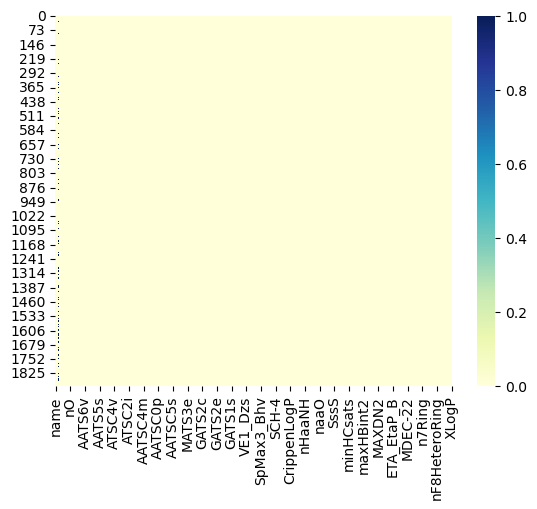

In [22]:
flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
]
columns_to_fill = [col for col in drugs_processed.columns if col not in flag_columns]
drugs_processed[columns_to_fill] = drugs_processed[columns_to_fill].fillna(0)

sns.heatmap(drugs_processed.isna(), cmap='YlGnBu')

In [23]:
# Checking
drugs[['chembl_id','XLogP']]

,chembl_id,XLogP
0,CHEMBL1200728,-0.646
1,CHEMBL734,-0.728
2,CHEMBL467,-1.606
3,CHEMBL602,0.106
4,CHEMBL504,-0.786
...,...,...
1890,CHEMBL403664,-8.139
1891,CHEMBL262777,NaN
1892,CHEMBL1201441,-4.197
1893,CHEMBL507870,NaN


In [24]:
drugs_processed[['chembl_id', 'XLogP']]

,chembl_id,XLogP
0,CHEMBL1200728,-0.646
1,CHEMBL734,-0.728
2,CHEMBL467,-1.606
3,CHEMBL602,0.106
4,CHEMBL504,-0.786
...,...,...
1882,CHEMBL3707290,-0.529
1883,CHEMBL4297412,2.248
1884,CHEMBL403664,-8.139
1885,CHEMBL1201441,-4.197


# Saving preprocessed dataset

In [26]:
drugs_processed.to_csv('/home/gustavo/github/mestrado/reworks/models/oral_vs_non_oral/data/fda_padel_pre_processed.csv', index=False)